# House Price Prediction




In [295]:
import pandas as pd
from sklearn.metrics import confusion_matrix

from sklearn import metrics

from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns 

###### Data Reading

In [363]:
df=pd.read_csv(r"C:\Users\tejas\OneDrive\Desktop\Machine Leaening\Housing.csv")

In [364]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [365]:
df.shape

(545, 13)

In [366]:

df=df.rename(columns={'stories':'storeroom'})

Column Renaming

In [367]:
df.head()

,price,area,bedrooms,bathrooms,storeroom,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   storeroom         545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [369]:
df.describe()

,price,area,bedrooms,bathrooms,storeroom,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [370]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'storeroom', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [371]:
df["furnishingstatus"].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

Furnishingstatus:
Furnished.
Semi-furnished.
Unfurnished.

In [372]:
df1=df

In [373]:
df.duplicated().sum()

0

Duplicate Value Is Not Present 

In [374]:
df1=pd.get_dummies(df1,prefix=['mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'prefarea', 'furnishingstatus'],drop_first=True)

converting binary values to number 

In [375]:
df1.head()

,price,area,bedrooms,bathrooms,storeroom,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,1,0,0,0,1,1,0,0
1,12250000,8960,4,4,4,3,1,0,0,0,1,0,0,0
2,12250000,9960,3,2,2,2,1,0,1,0,0,1,1,0
3,12215000,7500,4,2,2,3,1,0,1,0,1,1,0,0
4,11410000,7420,4,1,2,2,1,1,1,0,1,0,0,0


# Visualization 

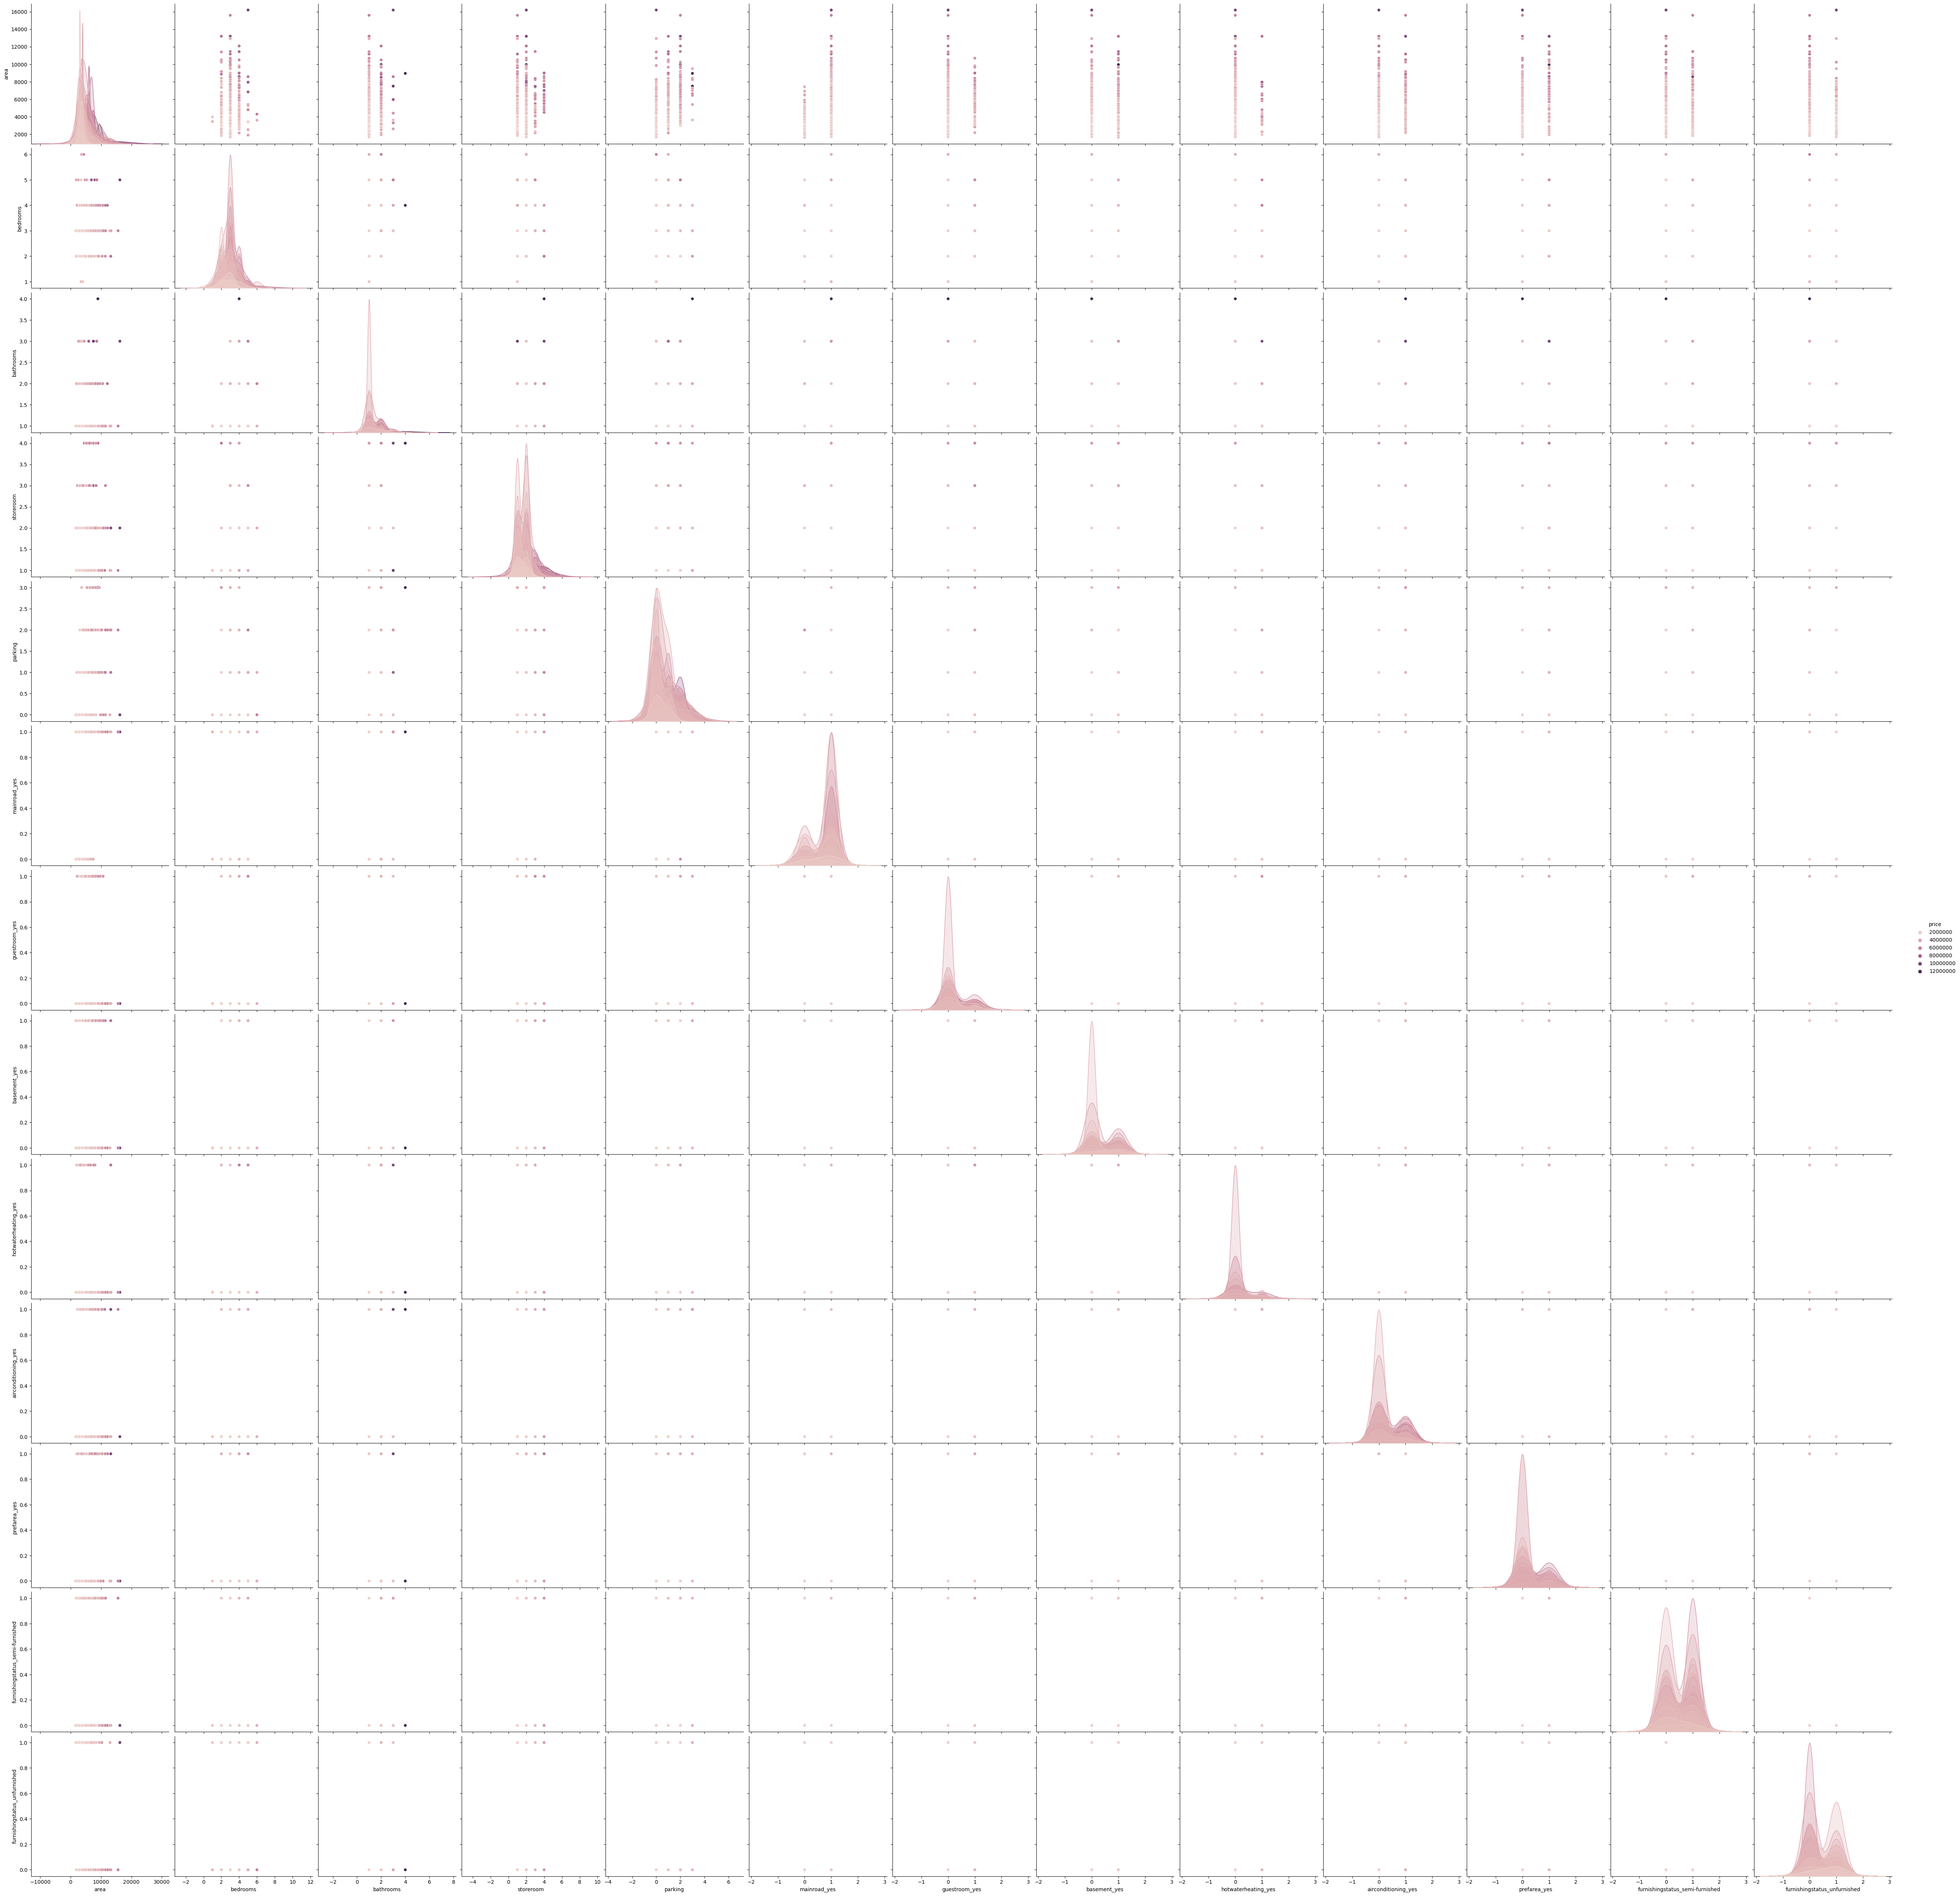

In [314]:
sns.pairplot(df1,hue='price',size=4)

In [315]:
co=df1.corr()

<Axes: >

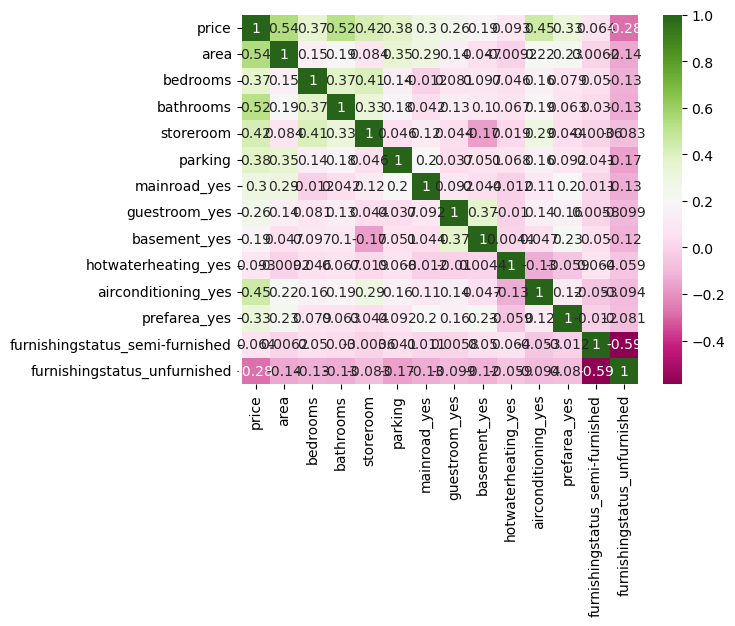

In [316]:
sns.heatmap(co,cmap="PiYG",annot=True)

In [317]:
df["area"].describe()

count      545.000000
mean      5150.541284
std       2170.141023
min       1650.000000
25%       3600.000000
50%       4600.000000
75%       6360.000000
max      16200.000000
Name: area, dtype: float64

<Axes: >

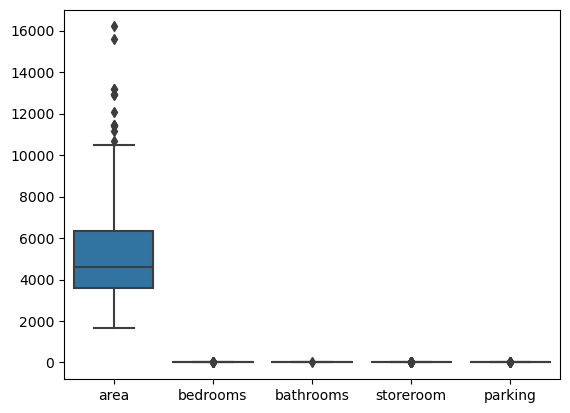

In [318]:
sns.boxplot(df.drop("price",axis=1))

In [319]:
#(df1["area"]>6000).sum()

In [320]:
#df1=df1[df1["area"]<6000].reset_index(drop=True)
#df1.head()

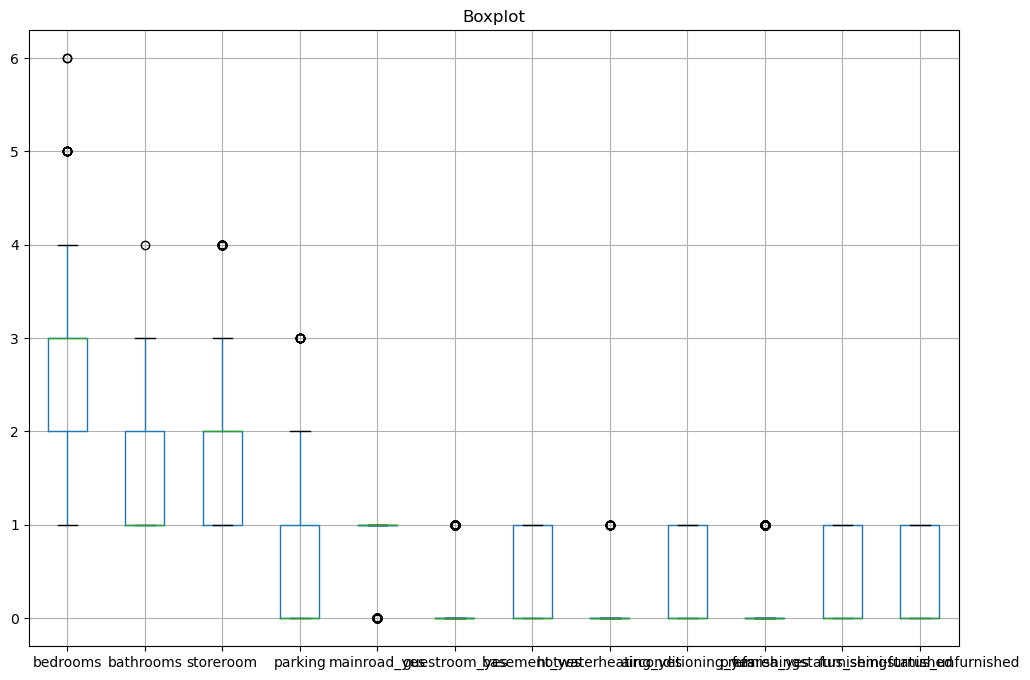

In [321]:
ax = df1.boxplot(
        column=['bedrooms', 'bathrooms', 'storeroom', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
        #by='price',
        figsize=(12, 8),     
        grid=True )

plt.title("Boxplot");

Outlier Detection

In [380]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'storeroom', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [381]:
df=df.drop([ 'mainroad', 'hotwaterheating',  'hotwaterheating','prefarea'],axis=1)
#df1.head()

Feture Selection Unnessory feture droping 

In [382]:
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'storeroom', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

# Machine learning Algoritham 

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
#df=pd.get_dummies(df,prefix=[
       #'guestroom', 'basement', 'airconditioning','furnishingstatus'],drop_first=True)

In [385]:
x=df.drop('price',axis=1)
y=df['price']
x.columns
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   storeroom         545 non-null    int64 
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   airconditioning   545 non-null    object
 7   parking           545 non-null    int64 
 8   furnishingstatus  545 non-null    object
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [386]:
x.head()

,area,bedrooms,bathrooms,storeroom,guestroom,basement,airconditioning,parking,furnishingstatus
0,7420,4,2,3,no,no,yes,2,furnished
1,8960,4,4,4,no,no,yes,3,furnished
2,9960,3,2,2,no,yes,no,2,semi-furnished
3,7500,4,2,2,no,yes,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,2,furnished


####  Traning and Testing Data

In [387]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=2)

In [388]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [390]:
one_hot=OneHotEncoder()
one_hot.fit(x[[  'guestroom','basement', 'airconditioning','furnishingstatus']])

OneHotEncoder()

In [391]:
transform=make_column_transformer((OneHotEncoder(categories=one_hot.categories_),[
      'guestroom','basement','airconditioning','furnishingstatus']),
                             remainder="passthrough")

# Linear Regression 

In [392]:
from sklearn.linear_model import LinearRegression

In [393]:
linReg=LinearRegression()


In [350]:
pipe_line=make_pipeline(transform,linReg)

In [394]:
pipe_line.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]),
                                                  ['guestroom', 'basement',
                                                   'airconditioning',
                                                   'furnishingstatus'])])),
                ('linearregression', LinearRegression())])

In [396]:
y_pred=pipe_line.predict(x_test)

In [397]:
metrics.r2_score(y_test, y_pred)

0.6129984142565489

In [423]:
pipe_line.predict(pd.DataFrame([[450,1,1,0,"no","no","no",1,"unfurnished"]],
                         columns=['area', 'bedrooms', 'bathrooms', 'storeroom', 'guestroom', 'basement',
       'airconditioning', 'parking', 'furnishingstatus']))

array([1452644.72052682])

In [416]:
x.head()

,area,bedrooms,bathrooms,storeroom,guestroom,basement,airconditioning,parking,furnishingstatus
0,7420,4,2,3,no,no,yes,2,furnished
1,8960,4,4,4,no,no,yes,3,furnished
2,9960,3,2,2,no,yes,no,2,semi-furnished
3,7500,4,2,2,no,yes,yes,3,furnished
4,7420,4,1,2,yes,yes,yes,2,furnished


In [415]:
x.columns

Index(['area', 'bedrooms', 'bathrooms', 'storeroom', 'guestroom', 'basement',
       'airconditioning', 'parking', 'furnishingstatus'],
      dtype='object')

# RandomForestRegressor

In [412]:
from sklearn.ensemble import RandomForestRegressor

random=RandomForestRegressor()

pipe_line4=make_pipeline(transform,random)



In [413]:

pipe_line4.fit(x_train,y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['no', 'yes'], dtype=object),
                                                                            array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)]),
                                                  ['guestroom', 'basement',
                                                   'airconditioning',
                                                   'furnishingstatus'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [414]:
Y_PRED=pipe_line4.predict(x_test)

metrics.r2_score(y_test,Y_PRED)

0.5539161609231986